# Import 

In [244]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import scikitplot as skplt

# data split
from sklearn.model_selection import train_test_split

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [246]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/JoshuaVincentius/Travel-Insurance-Package-Prediction/main/TravelInsurancePrediction.csv')

# Data Profiling and Preprocessing

## Data Profiling

In [247]:
# check all data
df.head()

,No,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [248]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [249]:
# check amount of age
df.Age.value_counts()

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

In [250]:
# check amount of employment type
df.EmploymentType.value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: EmploymentType, dtype: int64

In [251]:
# check amount of graduation type
df.GraduateOrNot.value_counts()

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

In [252]:
# check amount of annual income
df.AnnualIncome.value_counts()

800000     153
500000     143
1400000    130
1200000    112
1100000    107
600000      98
700000      95
1300000     91
300000      88
1500000     82
1050000     82
550000      81
1150000     79
900000      72
1250000     71
750000      65
400000      65
1000000     60
350000      55
850000      55
1350000     43
1700000     37
1450000     31
650000      30
950000      21
1750000     15
450000      15
1550000      5
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64

In [253]:
# check amount of family members
df.FamilyMembers.value_counts()

4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64

In [254]:
# check amount of chronic diseases
df.ChronicDiseases.value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

In [255]:
# check amount of frequent flyer
df.FrequentFlyer.value_counts()

No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

In [256]:
# check amount of travel abroad
df.EverTravelledAbroad.value_counts()

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

In [257]:
# check amount of travel insurance
df.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

## Data Cleaning

In [258]:
# check missing values
df.isna().sum()

No                     0
Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Data is clean and ready for further process

In [259]:
# check duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [260]:
# drop unnecessary columns
df.drop('No', axis = 1, inplace = True)

# check data type
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# EDA

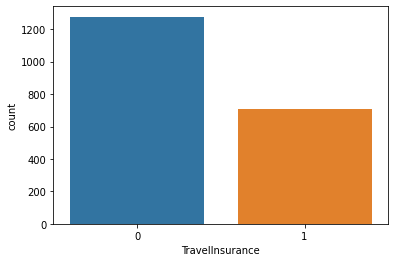

In [261]:
# check variable of travel insurance
sns.countplot(data = df, x = 'TravelInsurance')

There are less customers who buy the travel insurance package than those who don't buy.

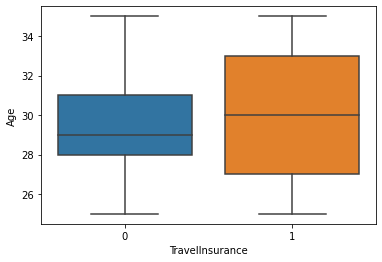

In [262]:
# check variable of age
sns.boxplot(data = df, x = 'TravelInsurance', y = 'Age')

It seems that customers who buy the travel insurance are generally older than those who don't buy

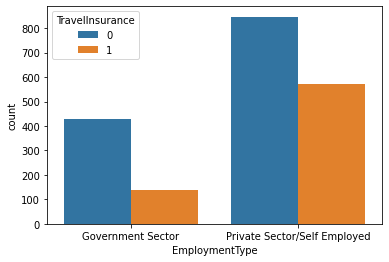

In [263]:
# check variable of employment type
sns.countplot(data = df, x = 'EmploymentType', hue = 'TravelInsurance')

It seems that mostly customers who buy travel insurance package are from private sector / self employed. The percentage of total customers from private sector/self employed who buy travel insurance package is higher than those from government sector.

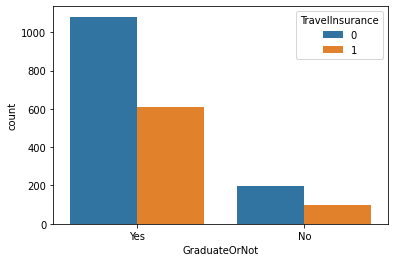

In [264]:
# check variable of graduate type
sns.countplot(data = df, x = 'GraduateOrNot', hue = 'TravelInsurance')

Mostly customers who buy travel insurance package are graduated although there are also high numbers that don't buy the package even though they are graduated.

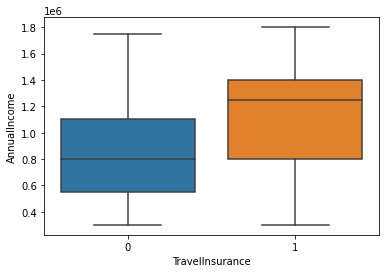

In [265]:
# check variable of annual income
sns.boxplot(data = df, x = 'TravelInsurance', y = 'AnnualIncome')

Customers who buy the travel insurance package tend to have higher annual income than those who don't buy

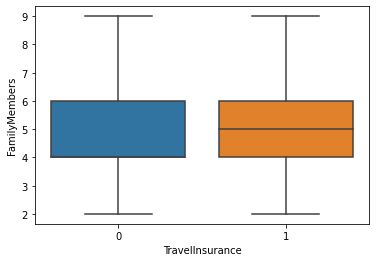

In [266]:
# check variable of family members
sns.boxplot(data = df, x = 'TravelInsurance', y = 'FamilyMembers')

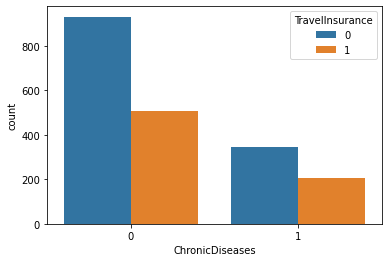

In [267]:
# check variable of chronic diseases
sns.countplot(data = df, x = 'ChronicDiseases', hue = 'TravelInsurance')

The customers who book the flight mostly don't have chronic disease. The customers who buy the insurance package is mostly from the ones that don't have chronic disease too.

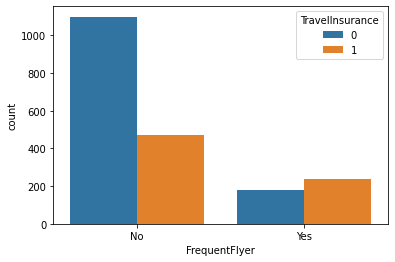

In [268]:
# check variable of frequent flyer
sns.countplot(data = df, x = 'FrequentFlyer', hue = 'TravelInsurance')

Most customers that book the flight is not frequent flyer. There is higher percentage that customers will buy travel insurance package if they are frequent flyer.

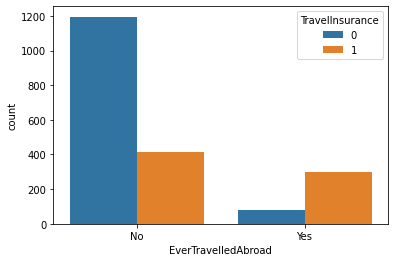

In [269]:
# check variable of ever travelled abroad
sns.countplot(data = df, x = 'EverTravelledAbroad', hue = 'TravelInsurance')

Most customers that book the flight have not travelled abroad. And there is higher percentage that customers will buy travel insurance package if they have travelled abroad.

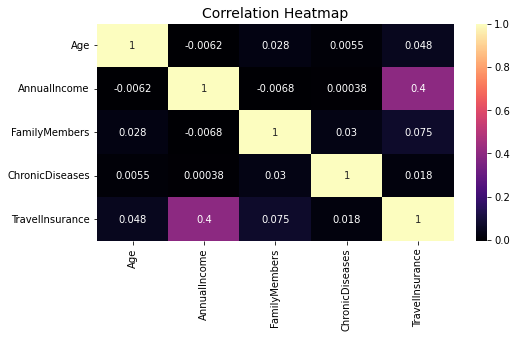

In [270]:
# heatmap for multicolinearity check
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap = 'magma', annot = True)
plt.title('Correlation Heatmap', fontsize = 14);

As we can see from the graph above, there is no multicolinearity (high correlation) between the dependent variables. Therefore, it is safe to proceed to the next process.

# Modelling Preparation

## Data Splitting

In [271]:
# Split Data
X = df.drop(['TravelInsurance'], axis = 1)
y = df['TravelInsurance']

In [272]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1000)

## Data Checking

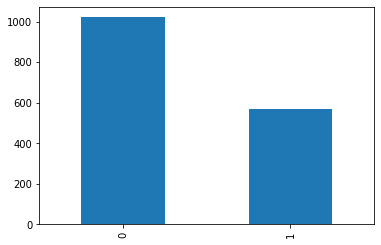

In [273]:
# data check
y_train.value_counts().plot.bar()

The difference between customers who don't buy and buy travel insurance package is pretty significant and therefore it will cause imbalanced model. Several techniques can be done to handle the imbalanced model like using GMeans function, oversampling technique or undersampling technique.

In [274]:
# generate dummy variables for the categorical variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

<ipython-input-275-cf9dda2d283c>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  dummy = pd.concat([X_train, y_train],1)


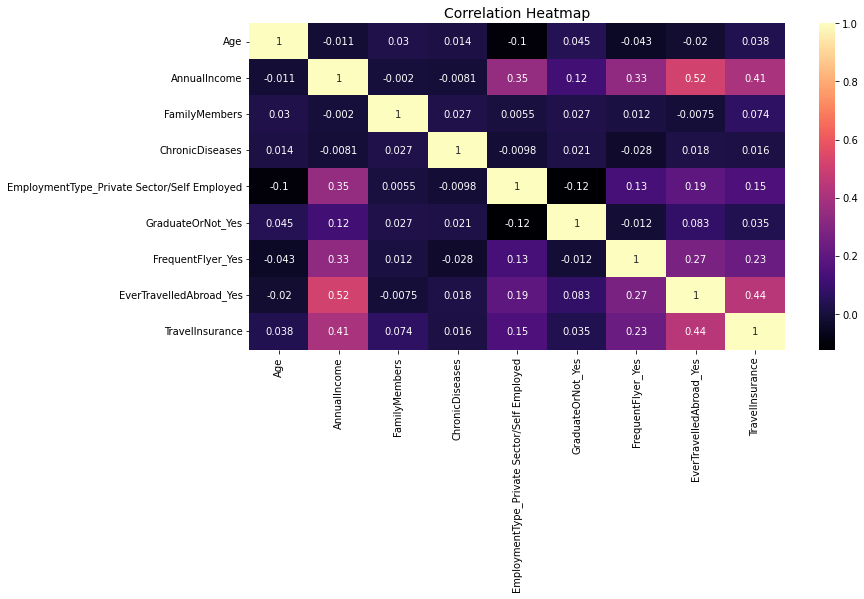

In [275]:
# create dummy dataframe
dummy = pd.concat([X_train, y_train],1)

# heatmap for multicolinearity check
plt.figure(figsize=(12,6))
sns.heatmap(dummy.corr(method='spearman'), cmap = 'magma', annot = True)
plt.title('Correlation Heatmap', fontsize = 14);

The multicolinearity check of dependent variables is complete as there is no indication of high correlation between the dependent variables.

In [276]:
# Find correlations with the travel insurance and sort
correlations = dummy.corr()['TravelInsurance'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 TravelInsurance                                1.000000
EverTravelledAbroad_Yes                        0.444667
AnnualIncome                                   0.401708
FrequentFlyer_Yes                              0.229778
EmploymentType_Private Sector/Self Employed    0.148992
FamilyMembers                                  0.077306
Age                                            0.051786
GraduateOrNot_Yes                              0.034649
ChronicDiseases                                0.015722
Name: TravelInsurance, dtype: float64


It seems that the chances customers who ever travelled abroad will buy travel insurance package is the highest among the rest followed by annual income and frequent flyer.

# Modelling

The model algorithms that we use in this classification modelling are KNN, Decision Tree, Random Forest and XGBoost Classifier.

## KNN Classifier

In [277]:
# define KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# fit KNN model with train data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [278]:
# generate hard result from KNN model using test data
knn_result = knn_model.predict(X_test)

# generate probability result from KNN model using test data
knn_proba = knn_model.predict_proba(X_test)

## Decision Tree Classifier

In [279]:
# define decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=1000)

# fit decision tree model with train data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1000)

In [280]:
# generate hard result from decision tree model using test data
dt_result = dt_model.predict(X_test)

# generate probability result from decision tree model using test data
dt_proba = dt_model.predict_proba(X_test)

## Random Forest Classifier

In [281]:
# define random forest model
rf_model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1000)

# fit random forest model with train data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=1000)

In [282]:
# generate hard result from random forest model using test data
rf_result = rf_model.predict(X_test)

# generate probability result from random forest model using test data
rf_proba = rf_model.predict_proba(X_test)

## XGBoost Classifier

In [283]:
# define XGBoost model
xgb_model = XGBClassifier(n_estimators=500, max_depth=5, random_state=1000)

# fit XGBoost model with train data
xgb_model.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=500, random_state=1000)

In [284]:
# generate hard result from XGBoost model using test data
xgb_result = xgb_model.predict(X_test)

# generate probability result from XGBoost model using test data
xgb_proba = xgb_model.predict_proba(X_test)

# Model Evaluation

## KNN Classifier

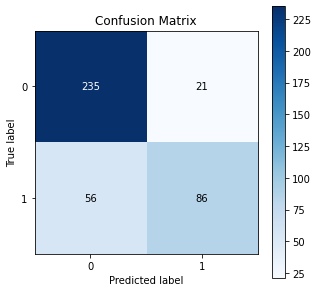

In [285]:
# check confusion matrix using KNN model
skplt.metrics.plot_confusion_matrix(y_test, knn_result, figsize=(5,5))

In [286]:
# check classification report using KNN model
pd.DataFrame(metrics.classification_report(y_test, knn_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.807560,0.803738,0.806533,0.805649,0.806197
recall,0.917969,0.605634,0.806533,0.761801,0.806533
f1-score,0.859232,0.690763,0.806533,0.774998,0.799125
support,256.000000,142.000000,0.806533,398.000000,398.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


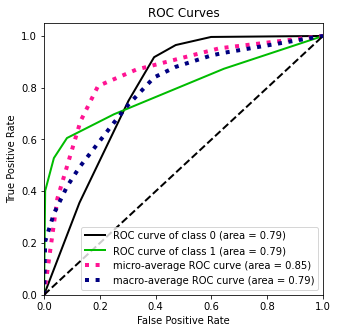

In [287]:
# check ROC curve using KNN model
skplt.metrics.plot_roc_curve(y_test, knn_proba, figsize=(5,5))

## Decision Tree Classifier

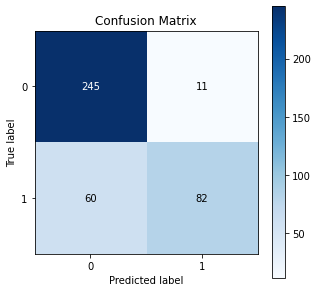

In [288]:
# check confusion matrix using decision tree model
skplt.metrics.plot_confusion_matrix(y_test, dt_result, figsize=(5,5))

In [289]:
# check classification report using decision tree model
pd.DataFrame(metrics.classification_report(y_test, dt_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.803279,0.881720,0.821608,0.842500,0.831265
recall,0.957031,0.577465,0.821608,0.767248,0.821608
f1-score,0.873440,0.697872,0.821608,0.785656,0.810800
support,256.000000,142.000000,0.821608,398.000000,398.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


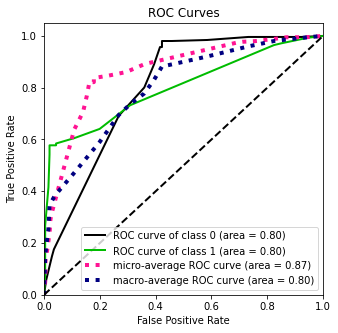

In [290]:
# check ROC curve using decision tree model
skplt.metrics.plot_roc_curve(y_test, dt_proba, figsize=(5,5))

## Random Forest Classifier

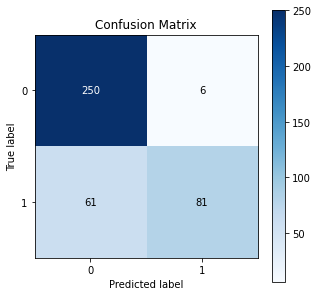

In [291]:
# check confusion matrix using random forest model
skplt.metrics.plot_confusion_matrix(y_test, rf_result, figsize=(5,5))

In [292]:
# check classification report using random forest model
pd.DataFrame(metrics.classification_report(y_test, rf_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.803859,0.931034,0.831658,0.867447,0.849233
recall,0.976562,0.570423,0.831658,0.773493,0.831658
f1-score,0.881834,0.707424,0.831658,0.794629,0.819607
support,256.000000,142.000000,0.831658,398.000000,398.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


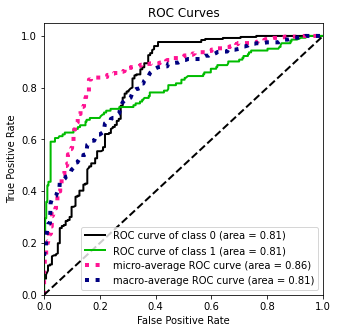

In [293]:
# check ROC curve using random forest model
skplt.metrics.plot_roc_curve(y_test, rf_proba, figsize=(5,5))

## XGBoost Classifier

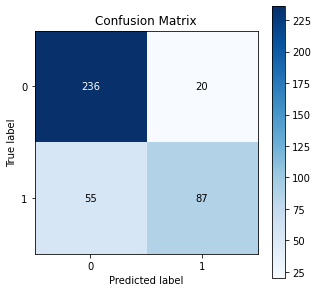

In [294]:
# check confusion matrix using XGBoost model
skplt.metrics.plot_confusion_matrix(y_test, xgb_result, figsize=(5,5))

In [295]:
# check classification report using XGBoost model
pd.DataFrame(metrics.classification_report(y_test, xgb_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.810997,0.813084,0.811558,0.812040,0.811741
recall,0.921875,0.612676,0.811558,0.767276,0.811558
f1-score,0.862888,0.698795,0.811558,0.780842,0.804343
support,256.000000,142.000000,0.811558,398.000000,398.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


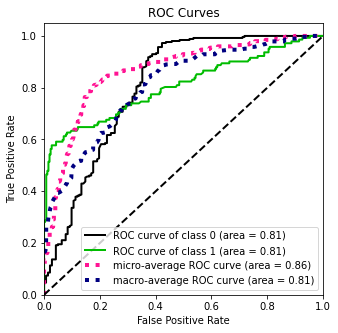

In [296]:
# check ROC curve using XGBoost model
skplt.metrics.plot_roc_curve(y_test, xgb_proba, figsize=(5,5))

# Model Interpretation

After the model evaluation process, we will compare the performance of each model. 
- From confusion matrix, the best model is XGBoost with 87 true predicted followed by decision tree (82) and random forest (81).
- From the classification report, the best model is random forest with f1 score on class 1 is about 70.7% followed by XGBoost (69.9%)and decision tree (69.8%).
- From ROC, the best model is XGBoost and random forest with 81% ROC curve of class 1.

Since XGBoost is one of the highest performers, we will use XGBoost as our model to predict customer who will buy the travel insurance package.

# Cross Validation and Hyperparameter Tuning

## Cross Validation

In [297]:
# import cross validation
from sklearn.model_selection import cross_val_score

In [298]:
# define XGBoost model
xgb_model = XGBClassifier(n_estimators=500, max_depth=5, random_state=1000)

In [299]:
# testing model using K-fold cross validation
cv = cross_val_score(
    estimator = xgb_model,
    X = X_train,
    y = y_train,
    cv = 10,
    n_jobs = 1,
    scoring = 'f1'
)

In [300]:
# F1 score of each validation subset
print('CV F1 score: %s' % cv)

CV F1 score: [0.6875     0.68627451 0.6728972  0.69230769 0.69902913 0.6122449
 0.70909091 0.69306931 0.74766355 0.69387755]


In [301]:
# average of F1 score
print('CV F1 score: %.3f +/- %.3f' % (np.mean(cv), np.std(cv)))

CV F1 score: 0.689 +/- 0.032


## Hyperparameter Tuning

In [302]:
# define parameters for XGB model
xgb_parameters = {
    'max_depth': [2,3,5,6,10],
    'n_estimators': [100,200,300,500,1000],
    'min_child_weight':[1,2,3,5,6],
    'booster': ['gbtree','gblinear']
}

In [303]:
# define XGB model
xgb_model = XGBClassifier(random_state=1000)

In [304]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [305]:
# define model with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = xgb_parameters,
    n_jobs=1,
    verbose=1,
    random_state=1000,
    n_iter=5,
    cv=10,
    scoring='f1'
)

random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(random_state=1000), n_iter=5,
                   n_jobs=1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'max_depth': [2, 3, 5, 6, 10],
                                        'min_child_weight': [1, 2, 3, 5, 6],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=1000, scoring='f1', verbose=1)

In [306]:
# shape RandomizedSearchCV results to dataframe structure
score_df = pd.DataFrame(random_search.cv_results_)
score_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_booster,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.418741,0.146284,0.018991,0.009321,1000,3,3,gbtree,"{'n_estimators': 1000, 'min_child_weight': 3, ...",0.723404,...,0.673267,0.742268,0.637363,0.757282,0.707071,0.761905,0.688889,0.707667,0.038075,1
1,0.154718,0.021998,0.007059,0.003626,200,5,5,gblinear,"{'n_estimators': 200, 'min_child_weight': 5, '...",0.611765,...,0.613636,0.581395,0.488372,0.606742,0.568182,0.729167,0.564706,0.600534,0.060992,4
2,0.111890,0.044362,0.002883,0.000560,200,5,3,gblinear,"{'n_estimators': 200, 'min_child_weight': 5, '...",0.611765,...,0.613636,0.581395,0.488372,0.606742,0.568182,0.729167,0.564706,0.600534,0.060992,4


In [307]:
# best of five RandomizedSearchCV
score_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_booster,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.418741,0.146284,0.018991,0.009321,1000,3,3,gbtree,"{'n_estimators': 1000, 'min_child_weight': 3, ...",0.723404,...,0.673267,0.742268,0.637363,0.757282,0.707071,0.761905,0.688889,0.707667,0.038075,1
3,0.558559,0.010065,0.008029,0.000975,500,2,6,gbtree,"{'n_estimators': 500, 'min_child_weight': 2, '...",0.687500,...,0.705882,0.673077,0.589474,0.715596,0.686275,0.780952,0.686869,0.689151,0.044403,2
4,0.155151,0.004096,0.002351,0.000185,500,5,6,gblinear,"{'n_estimators': 500, 'min_child_weight': 5, '...",0.571429,...,0.604167,0.620000,0.540000,0.666667,0.627451,0.740000,0.559140,0.610812,0.055687,3
1,0.154718,0.021998,0.007059,0.003626,200,5,5,gblinear,"{'n_estimators': 200, 'min_child_weight': 5, '...",0.611765,...,0.613636,0.581395,0.488372,0.606742,0.568182,0.729167,0.564706,0.600534,0.060992,4
2,0.111890,0.044362,0.002883,0.000560,200,5,3,gblinear,"{'n_estimators': 200, 'min_child_weight': 5, '...",0.611765,...,0.613636,0.581395,0.488372,0.606742,0.568182,0.729167,0.564706,0.600534,0.060992,4


In [308]:
# check the best estimator for XGB model
random_search.best_estimator_

XGBClassifier(min_child_weight=3, n_estimators=1000, random_state=1000)

In [309]:
# assign the best estimator to new variable
xgb_best_rs = random_search.best_estimator_

In [310]:
# generate hard result from XGBoost model using test data
xgb_best_rs_result = xgb_best_rs.predict(X_test)

# generate probability result from XGBoost model using test data
xgb_best_rs_proba = xgb_best_rs.predict_proba(X_test)

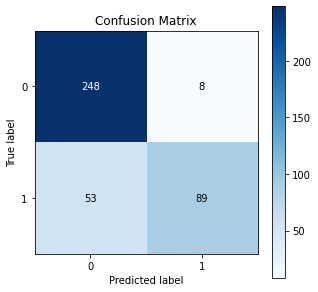

In [311]:
# check confusion matrix using XGBoost model
skplt.metrics.plot_confusion_matrix(y_test, xgb_best_rs_result, figsize=(5,5))

In [312]:
# check classification report using XGBoost model
pd.DataFrame(metrics.classification_report(y_test, xgb_best_rs_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.823920,0.917526,0.846734,0.870723,0.857317
recall,0.968750,0.626761,0.846734,0.797755,0.846734
f1-score,0.890485,0.744770,0.846734,0.817627,0.838496
support,256.000000,142.000000,0.846734,398.000000,398.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


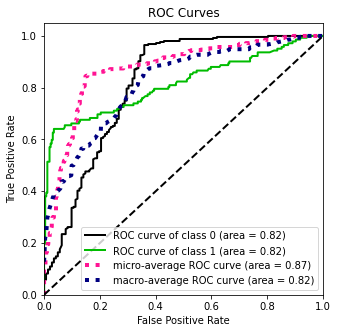

In [313]:
# check ROC curve using XGBoost model
skplt.metrics.plot_roc_curve(y_test, xgb_best_rs_proba, figsize=(5,5))

By implementing cross validation and hyperparameter tuning method, we improve the true predicted value from 87 to 89. We also improve the F1 score on class 1 from 69.9% to 74.4%. The ROC curve of class 1 also improves from 81% to 82%. However, there is still imbalance in the model as the F1 score on class 0 is 0.89 and F1 score on class 1 is 0.744. 

# Imbalanced Dataset

Undersampling method is done to balance the F1 score between class 0 and class 1. The model result will then be used to predict customers who will buy the travel insurance package.

In [314]:
from imblearn.under_sampling import RandomUnderSampler

# define the undersampling method
rus = RandomUnderSampler(random_state=0)
rus.fit(X,y)

# transform the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled,columns = X.columns)

In [315]:
# train test split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1000)

In [316]:
# generate dummy variables for the categorical variables
X_train_resampled = pd.get_dummies(X_train_resampled, drop_first = True)
X_test_resampled = pd.get_dummies(X_test_resampled, drop_first = True)

In [317]:
# define XGBoost model with best estimator
xgb_model = XGBClassifier(min_child_weight=3, n_estimators=1000, random_state=1000)

# fit XGBoost model with resampled train data
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(min_child_weight=3, n_estimators=1000, random_state=1000)

In [318]:
# generate hard result from XGBoost model using resampled test data
xgb_result = xgb_model.predict(X_test_resampled)

# generate probability result from XGBoost model using  resampled test data
xgb_proba = xgb_model.predict_proba(X_test_resampled)

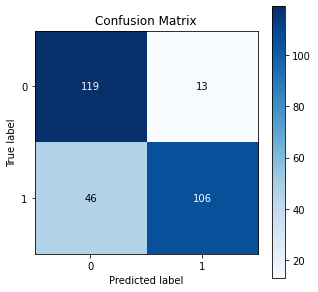

In [319]:
# check confusion matrix using XGBoost model
skplt.metrics.plot_confusion_matrix(y_test_resampled, xgb_result, figsize=(5,5))

In [320]:
# check classification report using XGBoost model
pd.DataFrame(metrics.classification_report(y_test_resampled, xgb_result, target_names = ['NotBuy', 'Buy'], output_dict=True))

,NotBuy,Buy,accuracy,macro avg,weighted avg
precision,0.721212,0.890756,0.792254,0.805984,0.811954
recall,0.901515,0.697368,0.792254,0.799442,0.792254
f1-score,0.801347,0.782288,0.792254,0.791817,0.791146
support,132.000000,152.000000,0.792254,284.000000,284.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


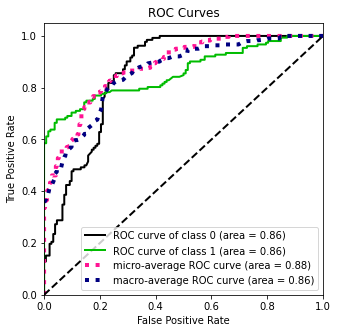

In [321]:
# check ROC curve using XGBoost model
skplt.metrics.plot_roc_curve(y_test_resampled, xgb_proba, figsize=(5,5))

Now the model gets better to predict customers who will buy the travel insurance package. By implementing undersampling method, we improve the true predicted value from 89 to 106. We also improve the F1 score on class 1 from 74.4% to 78.2%. The ROC curve of class 1 also improves from 82% to 86%. Further analysis of hyperparameter tuning and imbalanced model can be done to get the best model to know the customers insurance package prediction.

# Business Simulation: Travel Insurance Package Offering

XGBoost machine learning model is used to predict the customers that will buy the travel insurance package so that the insurance package can be offered to the right customers to minimize the cost. Now, we will make business simulation to compare the cost profit analysis without machine learning model and with machine learning model. Let's say that there is a ads feature to show the travel insurance package to the targeted customers. 

Below are the assumptions used in this business simulation:
1. The ads feature costs 5 USD per customer

2. Average travel ticket costs about 300 USD with its travel insurance package costs 20 USD per ticket
3. The ads performance for each customer is the same
4. Cost calculation is only generated from the ads feature and revenue calculation is only generated from the travel insurance package

## No Model Performance

These are the conditions:
1. Total customers are 284 people
2. Total customers who buy the insurance package are 152 people
3. Total customers who don't buy the travel insurance package are 132 people

Cost Profit Analysis
1. Cost: 284 x 5 USD = 1420 USD
2. Revenue: 152 x 20 USD = 3040 USD
3. Profit: 1620 USD
4. ROI: 1620/1420 = 114%

## Machine Learning Model Performance

These are the conditions:
1. Total customers are 119 people
2. Total customers who buy the insurance package are 106 people
3. Total customers who don't buy the travel insurance package are 13 people

Cost Profit Analysis
1. Cost: 119 x 5 USD = 595 USD
2. Revenue: 106 x 20 USD = 2120 USD
3. Profit: 1525 USD
4. ROI: 1525/595 = 256%

# Conclusion

The main factors that contribute to the customers behavior of buying the travel insurance package are ever travelled abroad, annual income and frequent flyer respectively. This analysis uses XGBoost model to predict customers that will buy the travel insurance package. The model accuracy is 89% by confusion matrix, 79.2% by F1 score and 86% by ROC score. By using this machine learning model, we can increase the ROI from 114% to 256%.